In [14]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
from dateutil.parser import parse
import pickle
from Module.Preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df_1_3 = pd.read_csv("CleanData/X_train_After_IPO_1.csv", encoding = 'cp949')
df_3_6 = pd.read_csv("CleanData/X_train_After_IPO_3.csv", encoding = 'cp949')
df_0 = pd.read_csv("CleanData/X_train_Before_IPO.csv", encoding = 'cp949')
df_end = pd.read_csv("CleanData/X_train_EndPrice_IPO.csv", encoding = 'cp949')

In [35]:
df_1_3

,매출총이익률,유동비율,부채비율,매출액증가율,상장일 대비 1개월 후 PER,상장일 대비 1개월 후 PBR,상장일 대비 1개월 후 EV/EBITDA,상장일 대비 1개월 평균 거래량회전율,상장일 대비 1개월 평균 일중변동성,개인거래비중,상장일 대비 1개월 후 시장회전율,상장일 대비 1개월 후 시장수익률,상장일 대비 1개월 후 고객예탁금 증감률,상장일 기준 국고3년시장금리,1개월 대비 3개월_수익률
상장일,,,,,,,,,,,,,,,
2009-04-07,0.265039,1.521216,1.267154,0.222942,35.328159,11.039808,28.338707,0.151739,8.326522,-0.107463,89.798043,125.336706,0.120767,0.035562,3.94
2009-04-10,0.588840,6.590178,0.116098,0.272506,17.722409,5.440252,14.652573,0.117143,10.164762,-0.298343,91.085238,122.666370,0.049811,-0.012951,3.88
2009-04-14,0.274725,1.772446,0.931424,0.347534,21.593257,2.778330,9.836695,0.129565,10.889565,-0.187719,92.460652,119.795146,0.055241,-0.042680,3.78
2009-04-17,0.142112,0.850896,2.723670,0.144142,12.178992,4.607519,9.617427,0.092381,10.182857,-0.145379,93.865476,118.721136,0.123481,-0.025820,3.72
2009-04-17,0.290372,1.294781,1.410724,0.071950,23.667026,5.421298,12.563497,0.156667,9.766190,0.082153,95.422857,118.721136,0.123481,-0.025820,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-11,0.239231,2.314002,0.261272,0.095854,41.628145,6.349806,27.879866,0.596818,13.109091,-0.164306,97.723864,90.999746,0.089625,0.122827,1.18
2021-03-17,0.287352,0.517623,2.535705,0.084414,-101.107148,64.320102,-745.809776,0.396522,14.193043,-0.411958,95.115870,92.027423,0.082477,0.059728,1.18
2021-03-23,1.000000,0.611110,-2.775198,0.681475,-13.391250,57.026603,-43.690635,0.156667,7.527083,-0.113725,92.276042,94.256606,0.085078,0.070617,1.13


In [3]:
def process(df):
    df['상장일'] = pd.to_datetime(df['상장일'])
    df = df.set_index(['상장일'])
    df = df.drop(['종목명','공모 시가총액'],axis = 1)
    
    return df

In [4]:
df_1_3 = process(df_1_3)
df_3_6 = process(df_3_6)
df_0 = process(df_0)
df_end = process(df_end)

In [6]:
df_1_3.columns

Index(['매출총이익률', '유동비율', '부채비율', '매출액증가율', '1개월 후 PER', '1개월 후 PBR',
       '1개월 후 EV/EBITDA', '1개월 평균 거래량회전율', '1개월 평균 일중변동률', '1달 후 시장 회전율',
       '1달 후 시장수익률', '1달 후 고객예탁금 증감률', '상장일 기준 국고3년시장금리', '1_3_수익률', '개인거래비중'],
      dtype='object')

In [39]:
df_1_3.columns = ['매출총이익률', '유동비율', '부채비율', '매출액증가율', '상장일 대비 1개월 후 PER', '상장일 대비 1개월 후 PBR',
       '상장일 대비 1개월 후 EV/EBITDA', '상장일 대비 1개월 평균 거래량회전율', '상장일 대비 1개월 평균 일중변동성', '상장일 대비 1개월 후 시장회전율',
       '상장일 대비 1개월 후 시장수익률', '상장일 대비 1개월 후 고객예탁금 증감률', '상장일 기준 국고3년시장금리', '1개월 대비 3개월 수익률', '상장일 대비 1개월 평균 개인거래비중']

In [40]:
df_1_3 = df_1_3[['매출총이익률', '유동비율', '부채비율', '매출액증가율', '상장일 대비 1개월 후 PER', '상장일 대비 1개월 후 PBR',
       '상장일 대비 1개월 후 EV/EBITDA', '상장일 대비 1개월 평균 거래량회전율', '상장일 대비 1개월 평균 일중변동성','상장일 대비 1개월 평균 개인거래비중','상장일 대비 1개월 후 시장회전율',
       '상장일 대비 1개월 후 시장수익률', '상장일 대비 1개월 후 고객예탁금 증감률', '상장일 기준 국고3년시장금리', '1개월 대비 3개월 수익률']]

<AxesSubplot:>

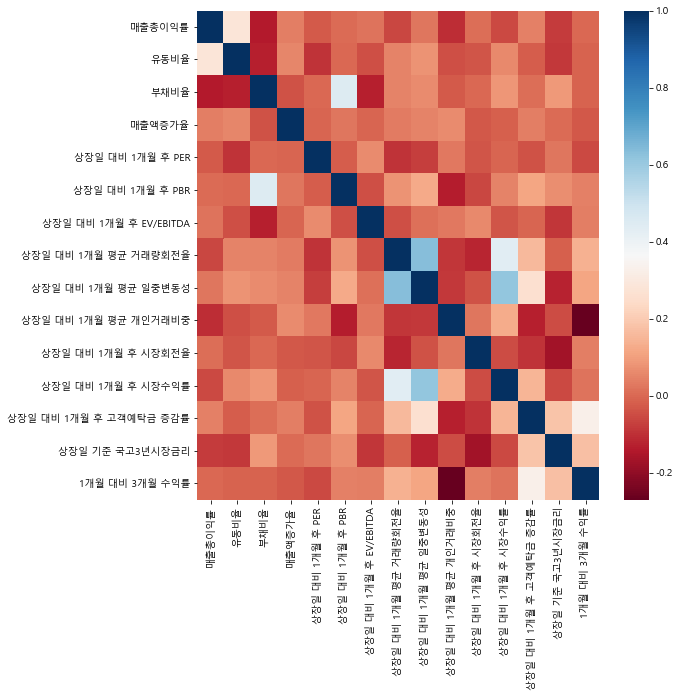

In [41]:
plt.figure(figsize =(9,9))
corr = df_1_3.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [44]:
df_3_6.columns = ['매출총이익률', '유동비율', '부채비율', '매출액증가율', '상장일 대비 3개월 후 PER', '상장일 대비 3개월 후 PBR',
       '상장일 대비 3개월 후 EV/EBITDA', '상장일 대비 3개월 평균 거래량회전율', '상장일 대비 3개월 평균 일중변동성', '상장일 대비 3개월 후 시장회전율',
       '상장일 대비 3개월 후 시장수익률', '상장일 대비 3개월 후 고객예탁금 증감률', '상장일 기준 국고3년시장금리', '3개월 대비 6개월 수익률', '상장일 대비 3개월 평균 개인거래비중']

In [45]:
df_3_6 = df_3_6[['매출총이익률', '유동비율', '부채비율', '매출액증가율', '상장일 대비 3개월 후 PER', '상장일 대비 3개월 후 PBR',
       '상장일 대비 3개월 후 EV/EBITDA', '상장일 대비 3개월 평균 거래량회전율', '상장일 대비 3개월 평균 일중변동성','상장일 대비 3개월 평균 개인거래비중','상장일 대비 3개월 후 시장회전율',
       '상장일 대비 3개월 후 시장수익률', '상장일 대비 3개월 후 고객예탁금 증감률', '상장일 기준 국고3년시장금리', '3개월 대비 6개월 수익률']]

<AxesSubplot:>

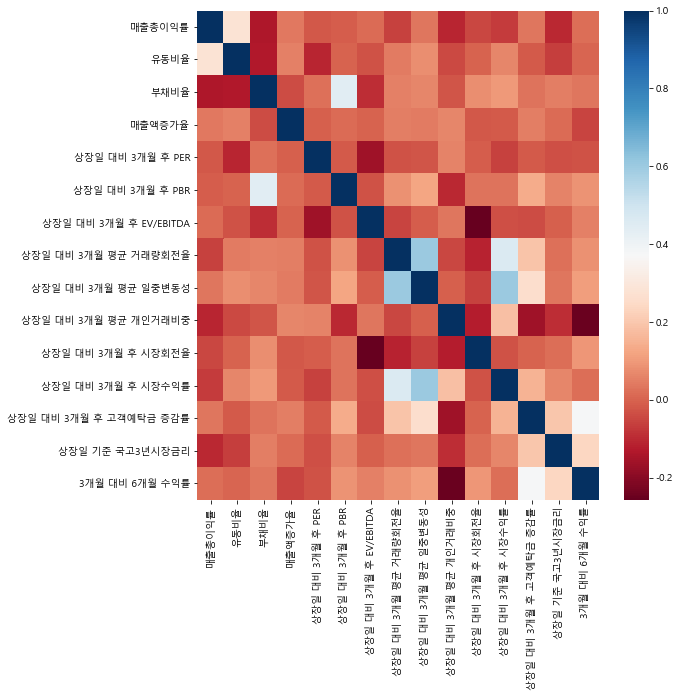

In [46]:
plt.figure(figsize =(9,9))
corr = df_3_6.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [30]:
df_0.columns = ['매출총이익률', '유동비율', '부채비율', '매출액증가율', '공모가 기준 PER', '공모가 기준 PBR',
       '공모가 기준 EV/EBITDA', '상장일 기준 1년 전 대비 시장수익률', '상장일 기준 1년 전 대비 고객예탁금 증감률',
       '상장일 기준 국고3년시장금리', '공모가 대비 1개월 수익률', '공모가 대비 3개월 수익률',
       '공모가 대비 6개월 수익률']

<AxesSubplot:>

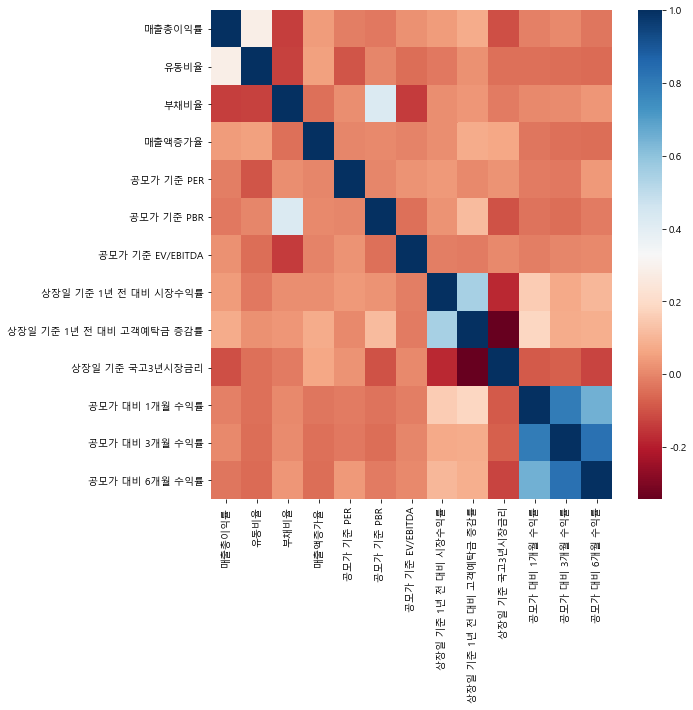

In [31]:
plt.figure(figsize =(9,9))
corr = df_0.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [33]:
df_end.columns = ['매출총이익률', '유동비율', '부채비율', '매출액증가율', '상장일 종가 기준 PER', '상장일 종가 기준 PBR',
       '상장일 종가 기준 EV/EBITDA', '상장일 기준 1년 전 대비 시장수익률', '상장일 기준 1년 전 대비 고객예탁금 증감률',
       '상장일 기준 국고3년시장금리', '상장일 종가 대비 1개월 수익률', '상장일 종가 대비 3개월 수익률',
       '상장일 종가 대비 6개월 수익률']

<AxesSubplot:>

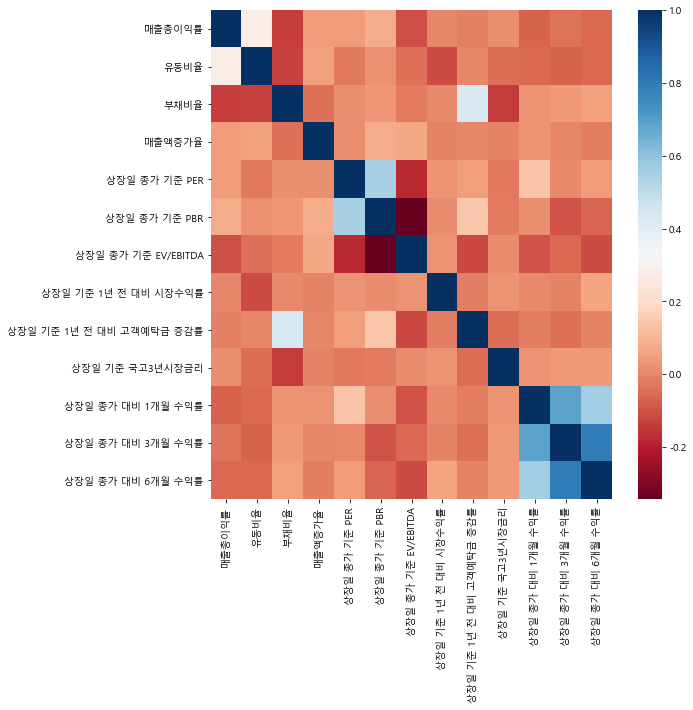

In [34]:
plt.figure(figsize =(9,9))
corr = df_end.corr()
sns.heatmap(corr, cmap = 'RdBu')